In [1]:
.libPaths()
library(tidyverse)
library(Seurat)
library(patchwork)

theme_set( theme_bw() )

root.dir <- here::here( "./" )
data.dir <- "../GEO/GSE167422/"

"%ni%" <- Negate("%in%")

sessionInfo()

[1] "/home/cl266/R_4.2.1"                     
[2] "/n/app/R/4.2.1-gcc-9.2.0/lib64/R/library"

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Attaching SeuratObject



R version 4.2.1 (2022-06-23)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /n/app/openblas/0.3.19-gcc-9.2.0/lib/libopenblas_haswellp-r0.3.19.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] patchwork_1.1.2    SeuratObject_4.1.3 Seurat_4.3.0       lubridate_1.9.2   
 [5] forcats_1.0.0      stringr_1.5.0      dplyr_1.1.1        purrr_1.0.1       
 [9] readr_2.1.4        tidyr_1.3.0        tibble_3.2.1       ggplot2_3.4.2     
[13] tidyverse_2.0.0   

loaded via a namespace (and not

# Figure 7

This is to reproduce the Figure 7 and associated Figure S14.

In [2]:
tictoc::tic()
integrated.xeno <- readRDS( file=glue::glue("{data.dir}20230503_11_xeno_integrated.rds") )
tictoc::toc()

12.655 sec elapsed


Warning message in FetchData.Seurat(integrated.xeno, vars = c("UMAP_1", "UMAP_2", :
“The following requested variables were not found: treatment”


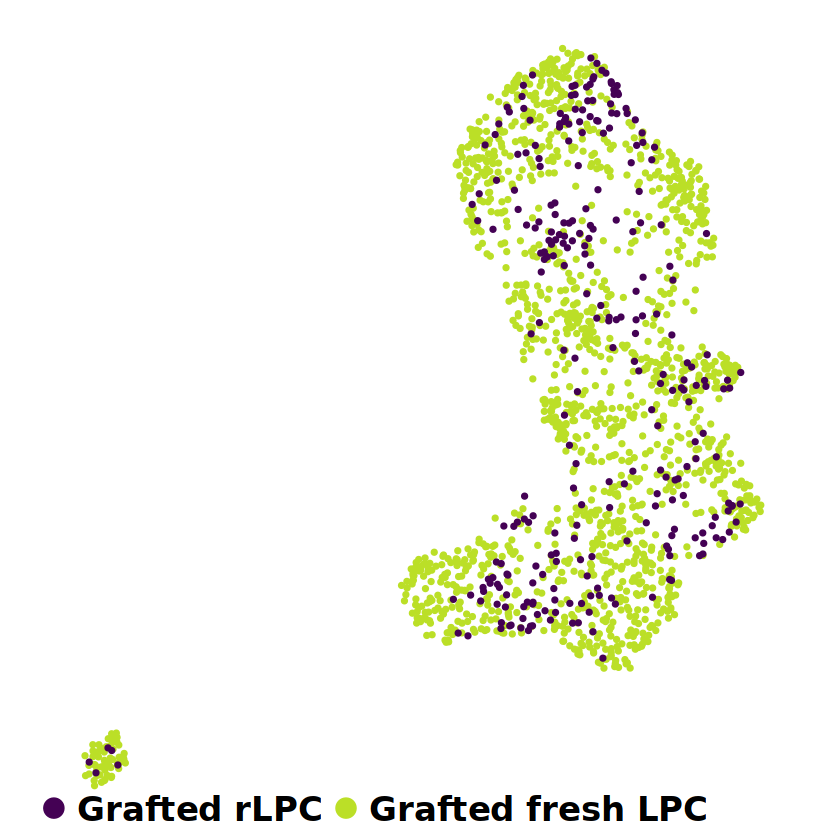

In [3]:
p1 <-
ggplot() +
  geom_point( 
    data=FetchData( 
            integrated.xeno, 
            vars = c("UMAP_1", "UMAP_2", "treatment", "batch2"  ) 
    ) %>% 
    mutate(
        batch3 = ifelse( batch2 == "rLPC", "Grafted rLPC","Grafted fresh LPC" ),
        batch3 = factor( batch3, levels = c("Grafted rLPC", "Grafted fresh LPC") )
    ),
    aes(x = UMAP_1, y = UMAP_2, colour = batch3),
    size = 1
  ) +
#   ggrepel::geom_label_repel(
#     data=FetchData(
#             integrated.expanded,
#             vars = c("UMAP_1", "UMAP_2", "label.0.2", "integrated_snn_res.0.2" )
#         ) %>%
#         filter( integrated_snn_res.0.2 == 3 ) %>%
#         group_by( label.0.2 ) %>%
#         summarize(
#             across(
#                 UMAP_1:UMAP_2,
#                 ~mean(.x)
#             )
#         ),
#     aes( 
#       x = UMAP_1, 
#       y = UMAP_2, 
#       label = label.0.2
#     ),
#     size = 7.5,
#     fontface = "bold",
#     alpha = 0.8
#   ) +
  cowplot::theme_cowplot() +
  scale_x_continuous( expand = expansion(0.1, 0)) +
  scale_colour_viridis_d( 
      option = "D", 
      end = 0.9 
  ) +
#   scale_fill_manual( 
#     guide = FALSE,
#     values = c( "white", "gold" )
#   ) +  
  guides(
    color = guide_legend(
      override.aes =
        list(
          size=5,
          alpha = 1.0
        ),
      ncol= 4,
      byrow = T
    )
  ) +
  theme( 
    axis.ticks   = element_blank(),
    axis.title   = element_blank(),
    axis.text    = element_blank(),
    panel.grid   = element_blank(),
    panel.border = element_blank(),
    axis.line    = element_blank(),
#    legend.position = "right",
    legend.position = c(0.5, 0.025), 
    legend.justification = c("center", "center"),
#    legend.box.just = "center",
    legend.title = element_blank(),
    legend.text  = element_text( size = 20, face = "bold" ),
    legend.text.align = 0.5
  )

options( repr.plot.width = 7, repr.plot.height = 7 )
p1

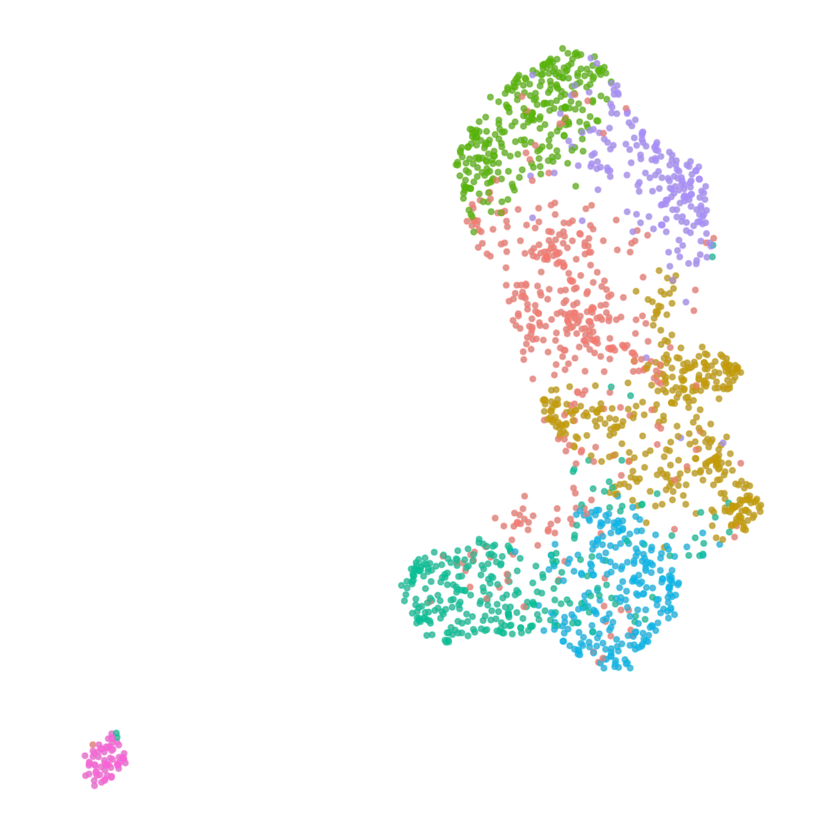

In [4]:
p2 <-
ggplot() +
  geom_point( 
    data=FetchData( integrated.xeno, vars = c("UMAP_1", "UMAP_2"  ) ),
    aes(x = UMAP_1, y = UMAP_2),
    size = 0.5,
    colour = "grey"
  ) +
  geom_point( 
    data=FetchData( 
            integrated.xeno, 
            vars = c("UMAP_1", "UMAP_2", "batch2", "integrated_snn_res.0.6", "free.annotation"  ) 
    ) %>% filter( batch2 %in% c("rLPC", "fLPC") ),
#    aes(x = UMAP_1, y = UMAP_2, colour = integrated_snn_res.0.6),
    aes(x = UMAP_1, y = UMAP_2, colour = free.annotation),  # upon reviewer's request
    size = 1,
    alpha = 0.5
  ) +
# upon reviewer's request
#   ggrepel::geom_text_repel(
#     data=FetchData(
#             integrated.xeno,
#             vars = c("UMAP_1", "UMAP_2", "integrated_snn_res.0.6", "free.annotation" )
#         ) %>%
#         group_by( integrated_snn_res.0.6, free.annotation ) %>%
#         summarize(
#             across(
#                 UMAP_1:UMAP_2,
#                 ~mean(.x)
#             )
#         ),
#     aes( 
#       x = UMAP_1, 
#       y = UMAP_2, 
#       label = free.annotation
#     ),
#     size = 7.5,
#     fontface = "bold",
#     alpha = 0.8
#   ) +
  cowplot::theme_cowplot() +
  scale_x_continuous( expand = expansion(0.1, 0)) +
# upon reviewer's request
#   scale_colour_viridis_d( 
#       option = "C", 
#       end = 0.9 
#   ) +
  guides(
    color = guide_legend(
      override.aes =
        list(
          size=5,
          alpha = 1.0
        ),
      ncol= 1,
      byrow = T
    )
  ) +
  theme( 
    axis.ticks   = element_blank(),
    axis.title   = element_blank(),
    axis.text    = element_blank(),
    panel.grid   = element_blank(),
    panel.border = element_blank(),
    axis.line    = element_blank(),
#    legend.position = "bottom",
    legend.position = "none",
    legend.justification = c("center", "center"),
#    legend.box.just = "center",
    legend.title = element_blank(),
    legend.text  = element_text( size = 15, face = "bold" ),
    legend.text.align = 0,
#     legend.background = element_rect(fill = "white", colour = "black" ),
#     legend.key = element_blank(),
#     legend.spacing = unit(2, "cm")
  )

options( repr.plot.width = 7, repr.plot.height = 7 )
p2



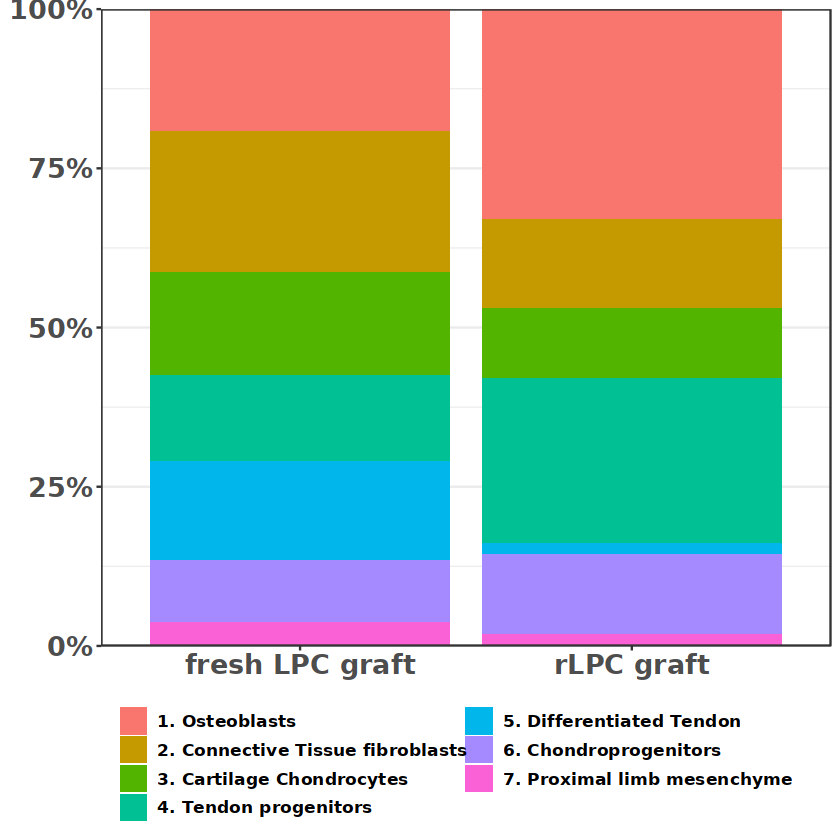

In [5]:
options( repr.plot.height = 7, repr.plot.width = 7)

p3 <-
integrated.xeno@meta.data %>%
dplyr::count( free.annotation, batch3 ) %>%
left_join(
    integrated.xeno@meta.data %>%
    dplyr::count( batch3 ),
    by = "batch3",
    suffix = c("", ".total")
) %>%
mutate(
    fraction = n / n.total
) %>%
filter( batch3 != "cLPC" ) %>%
ggplot( aes( x = batch3, y = fraction, fill = free.annotation ) ) +
geom_bar( stat = "identity" ) +
# scale_fill_viridis_d( name = "", option = "C", end = 0.9 ) +
scale_y_continuous( label = scales::percent, expand = expansion( add = 0, mult = 0 ) ) +
#ggtitle( "LPC-derived cell types represented in xenografts" ) +
theme(
    legend.position = "bottom",
    legend.title = element_blank(),
    legend.justification = "left",
    axis.title.y = element_blank(),
    axis.title.x = element_blank(),
    axis.text.y = element_text( size = 16, face = "bold" ),
    axis.text.x = element_text( size = 16, face = "bold" ),
    legend.text = element_text( size = 10, face = "bold" ),
#    plot.title = element_text( size = 20, face = "bold" )
) +
guides( 
    fill = guide_legend(ncol = 2 )
)

options( repr.plot.width = 7, repr.plot.height = 7 )
p3

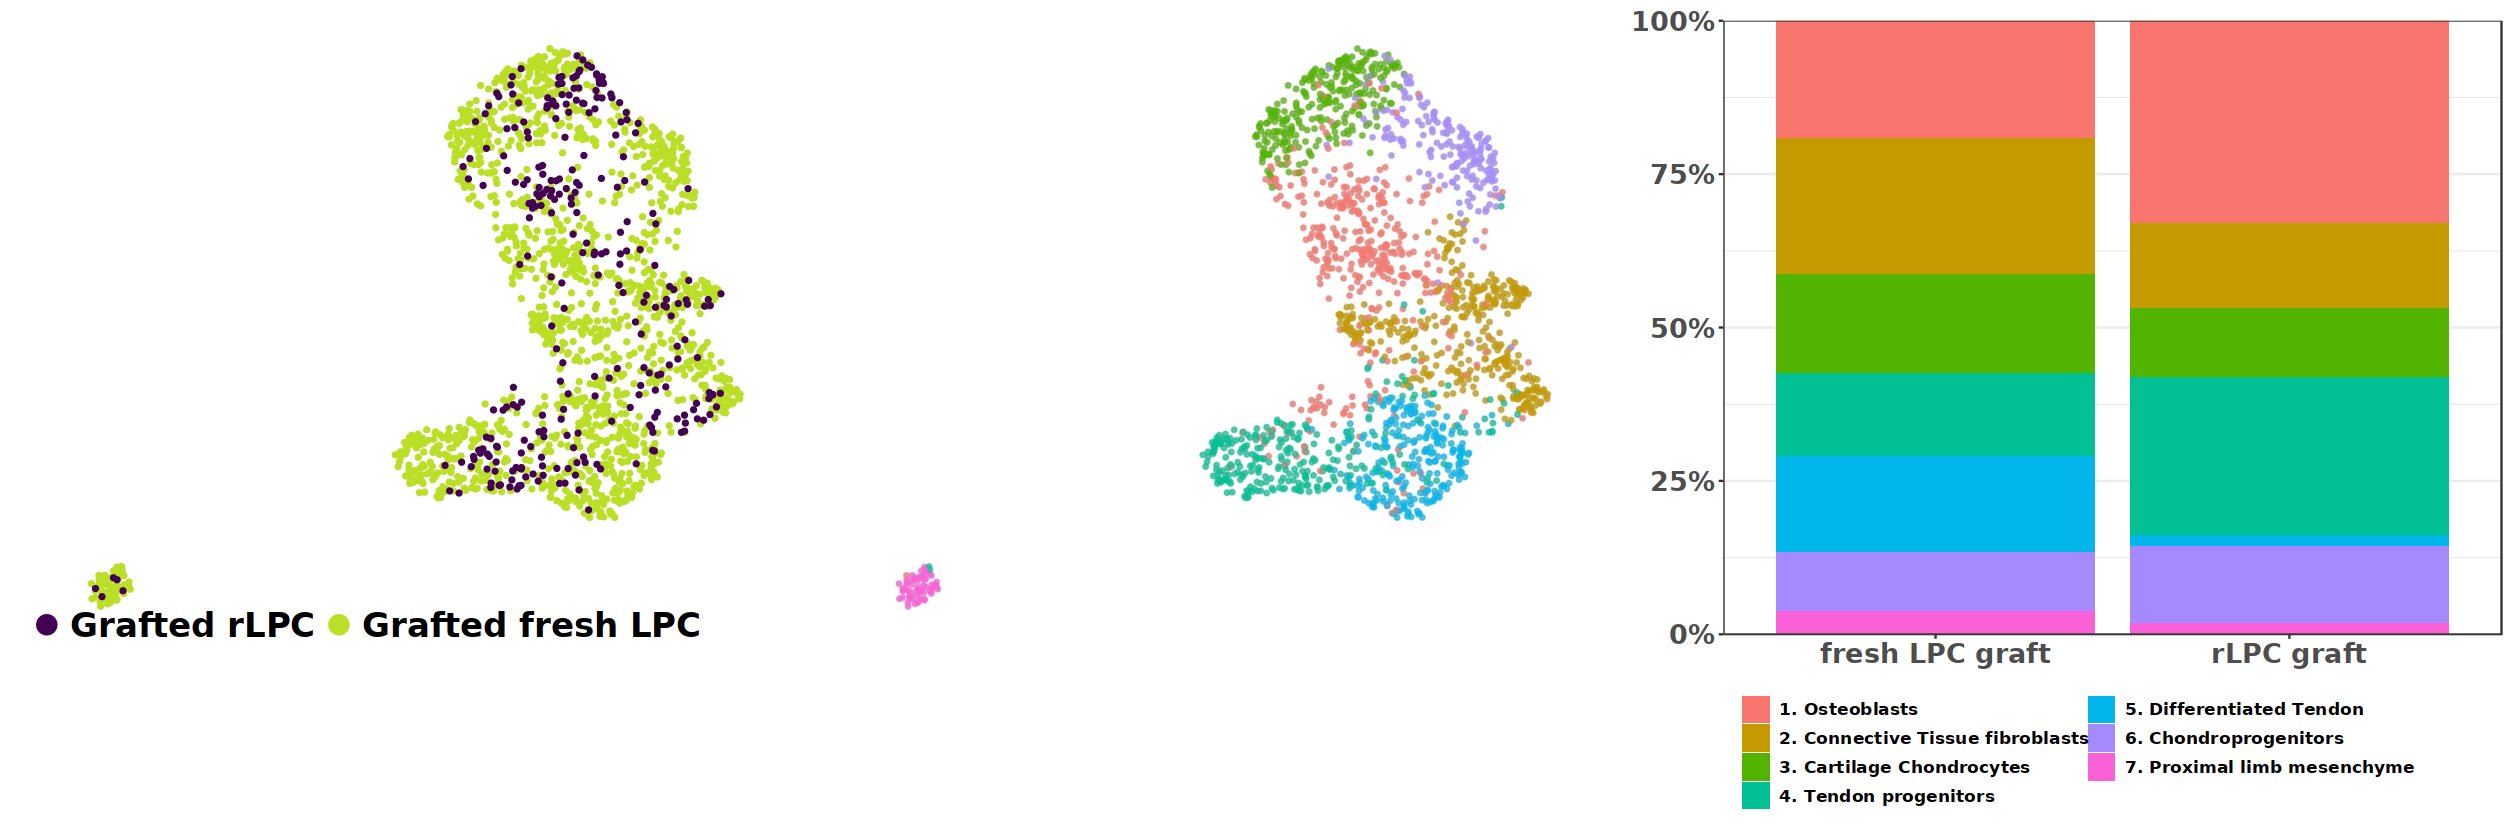

In [6]:
options( repr.plot.width = 21, repr.plot.height = 7 )

p1 + p2 + p3

In [82]:
# ggsave("./figures/Figure7C_revised.png", plot = p1 + p2 + p3, width=21, height=7)

# Figure S7

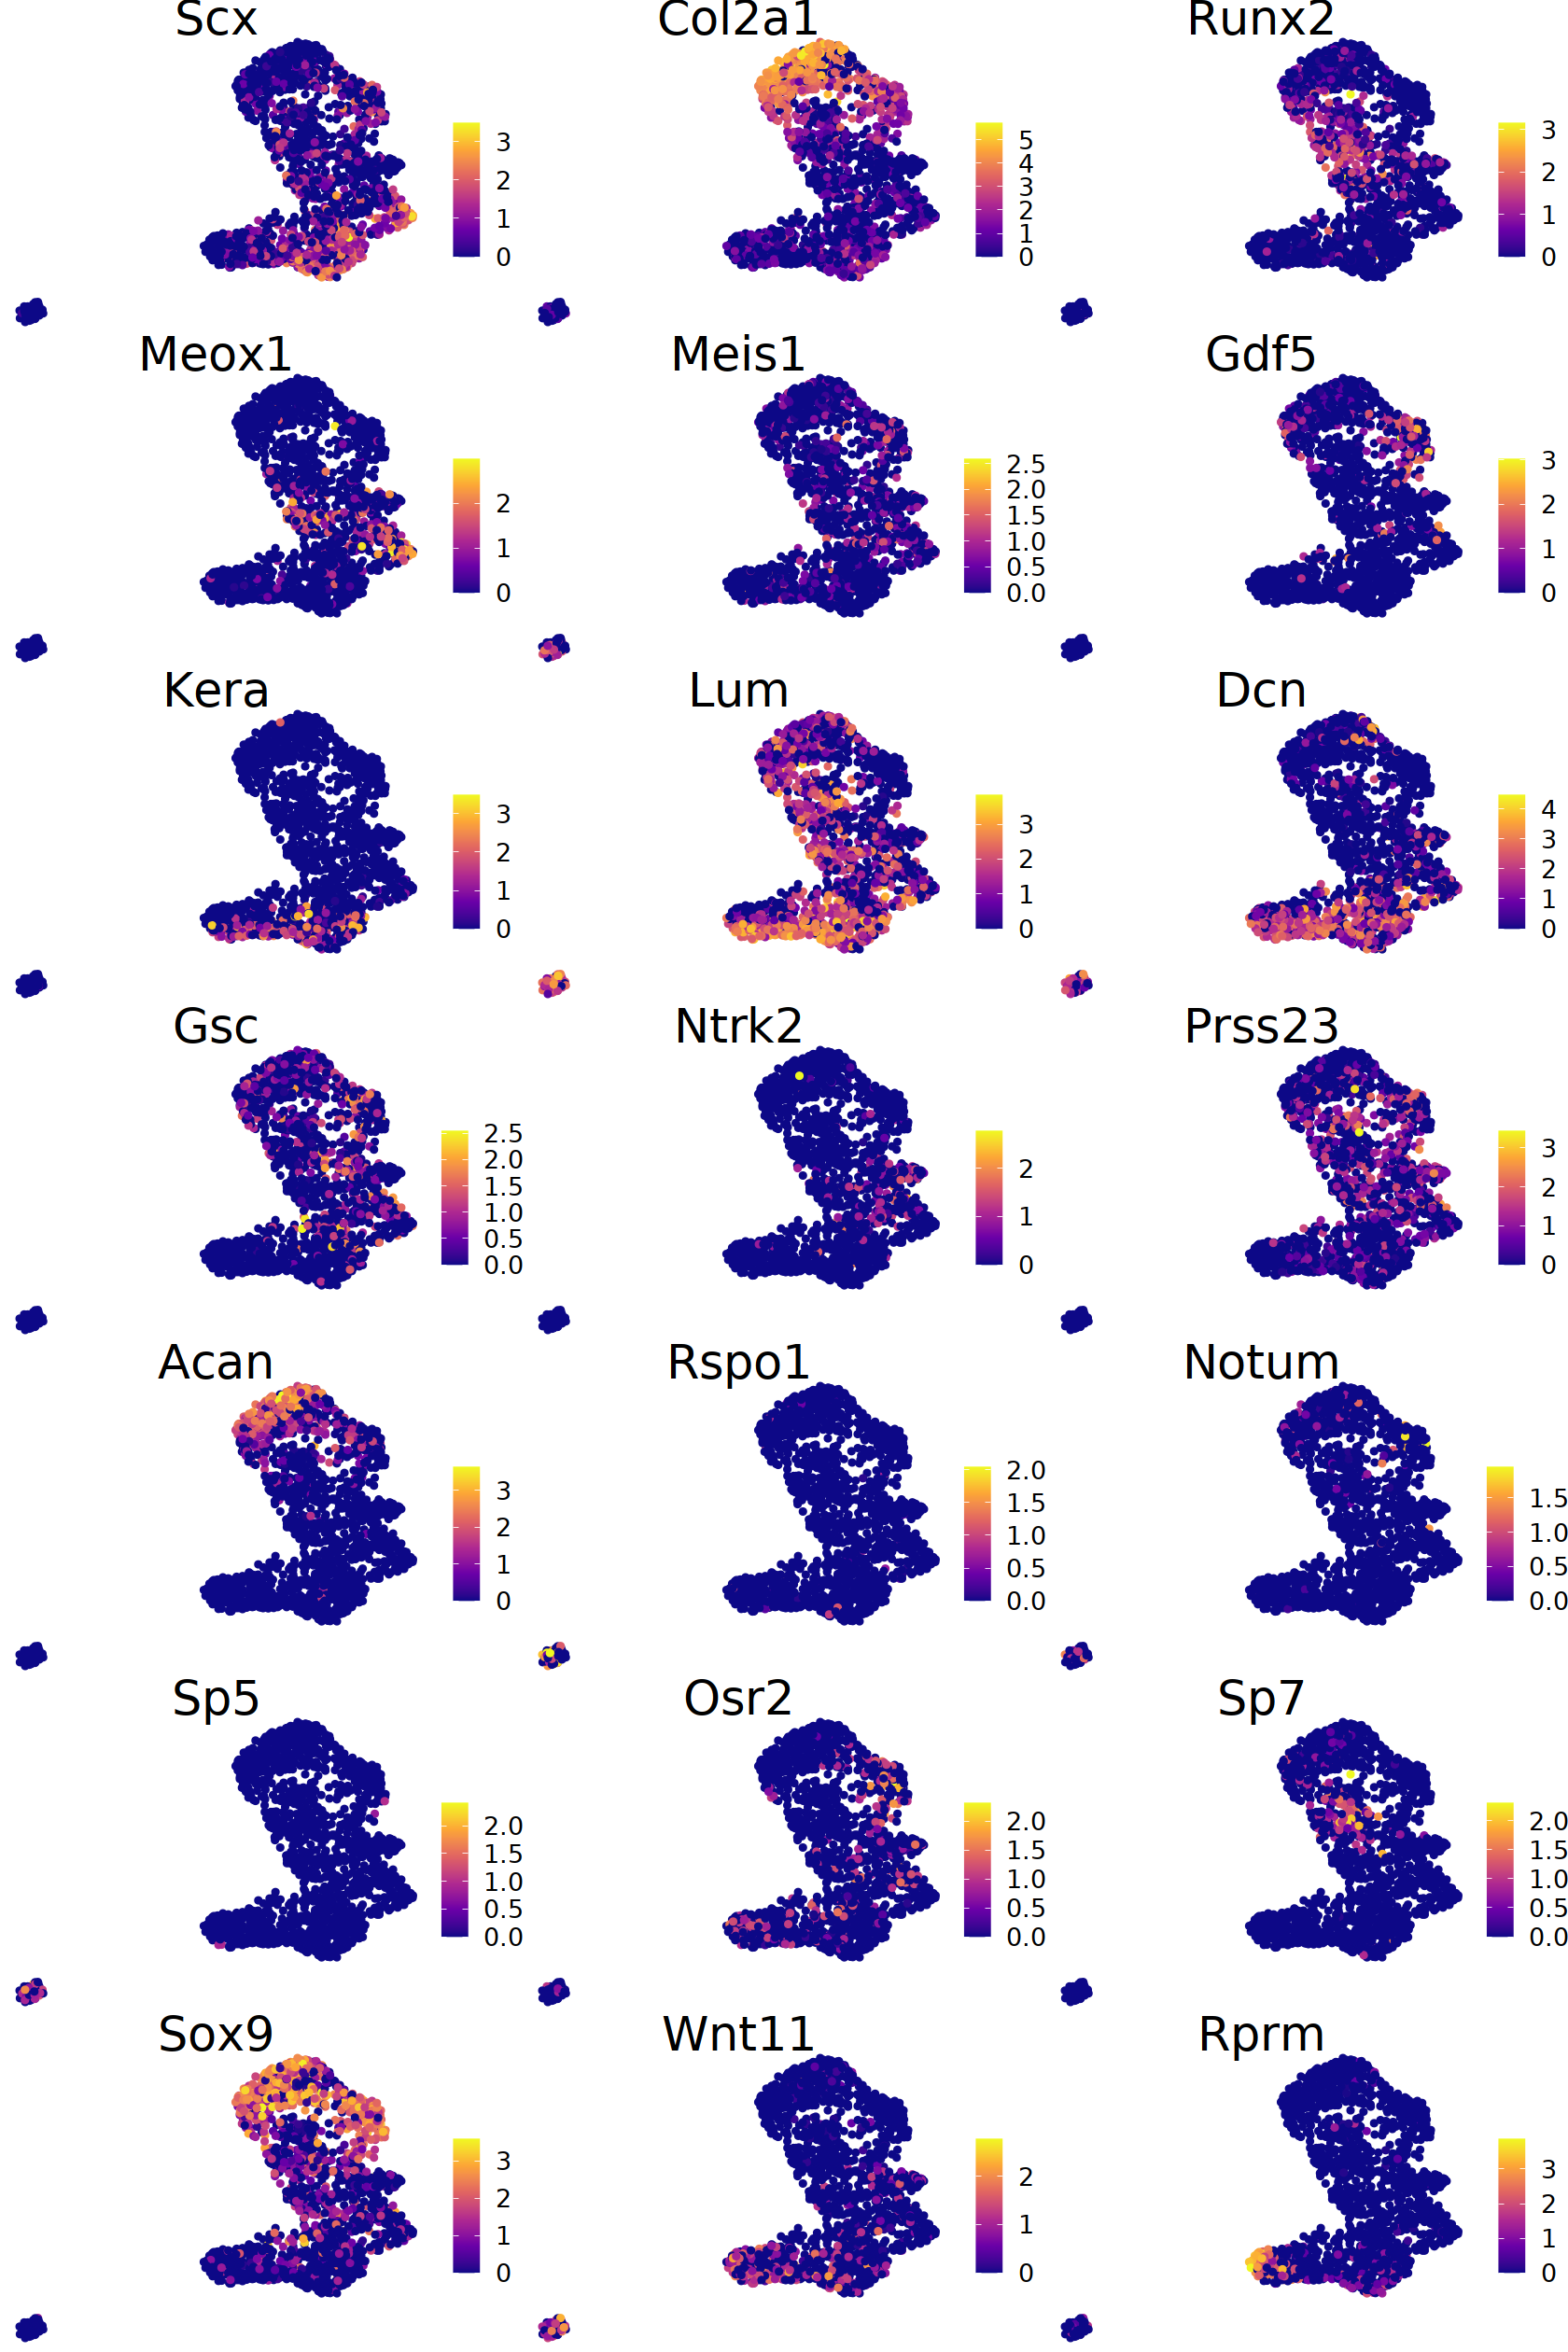

In [7]:
DefaultAssay( integrated.xeno ) <- "RNA"

gene.list <- c(
    "Scx", "Col2a1", "Runx2", 
    "Meox1", "Meis1", "Gdf5", 
    "Kera", "Lum", "Dcn",
    "Gsc", "Ntrk2", "Prss23",
    "Acan", "Rspo1", "Notum",
    "Sp5", "Osr2", "Sp7",
    "Sox9", "Wnt11", "Rprm"
)

p <-
FetchData(
    integrated.xeno,
    vars = c(
        paste0( gene.list ),
        "UMAP_1", "UMAP_2"
    )
) %>%
pivot_longer(
    cols = any_of( gene.list ),
    names_to = "feature",
    values_to = "expression"
) %>%
mutate(
    feature = gsub("mm10\\.yuji-", "", feature),
    feature = factor(
        feature,
        levels = gene.list
    )
) %>%
arrange( feature, sample(1:n()) ) %>%
group_split( feature ) %>%
map(
    ~ggplot( ., aes( x = UMAP_1, y = UMAP_2, colour = expression) ) +
    geom_point() +
    scale_colour_viridis_c( name = NULL, option = "C" ) +
    ggtitle( .$feature %>% unique() )
) %>%
reduce(`+`) +
plot_layout(ncol = 3) &
theme_void() &
  theme(
    #plot.margin = margin(0, 0, 0, 0, "line"),
    axis.line = element_blank(),
    axis.title = element_blank(),
    axis.ticks = element_blank(),
    axis.text = element_blank(),
    text = element_text( size = 20 ),
    plot.title = element_text( size = 30, face="bold.italic", margin=margin(0,0,-10,0), hjust = 0.5 )
  )

options( repr.plot.width = 14, repr.plot.height = 21 )
p

In [9]:
# ggsave("./figures/FigureS7A.png", plot = p, width=14, height=21)

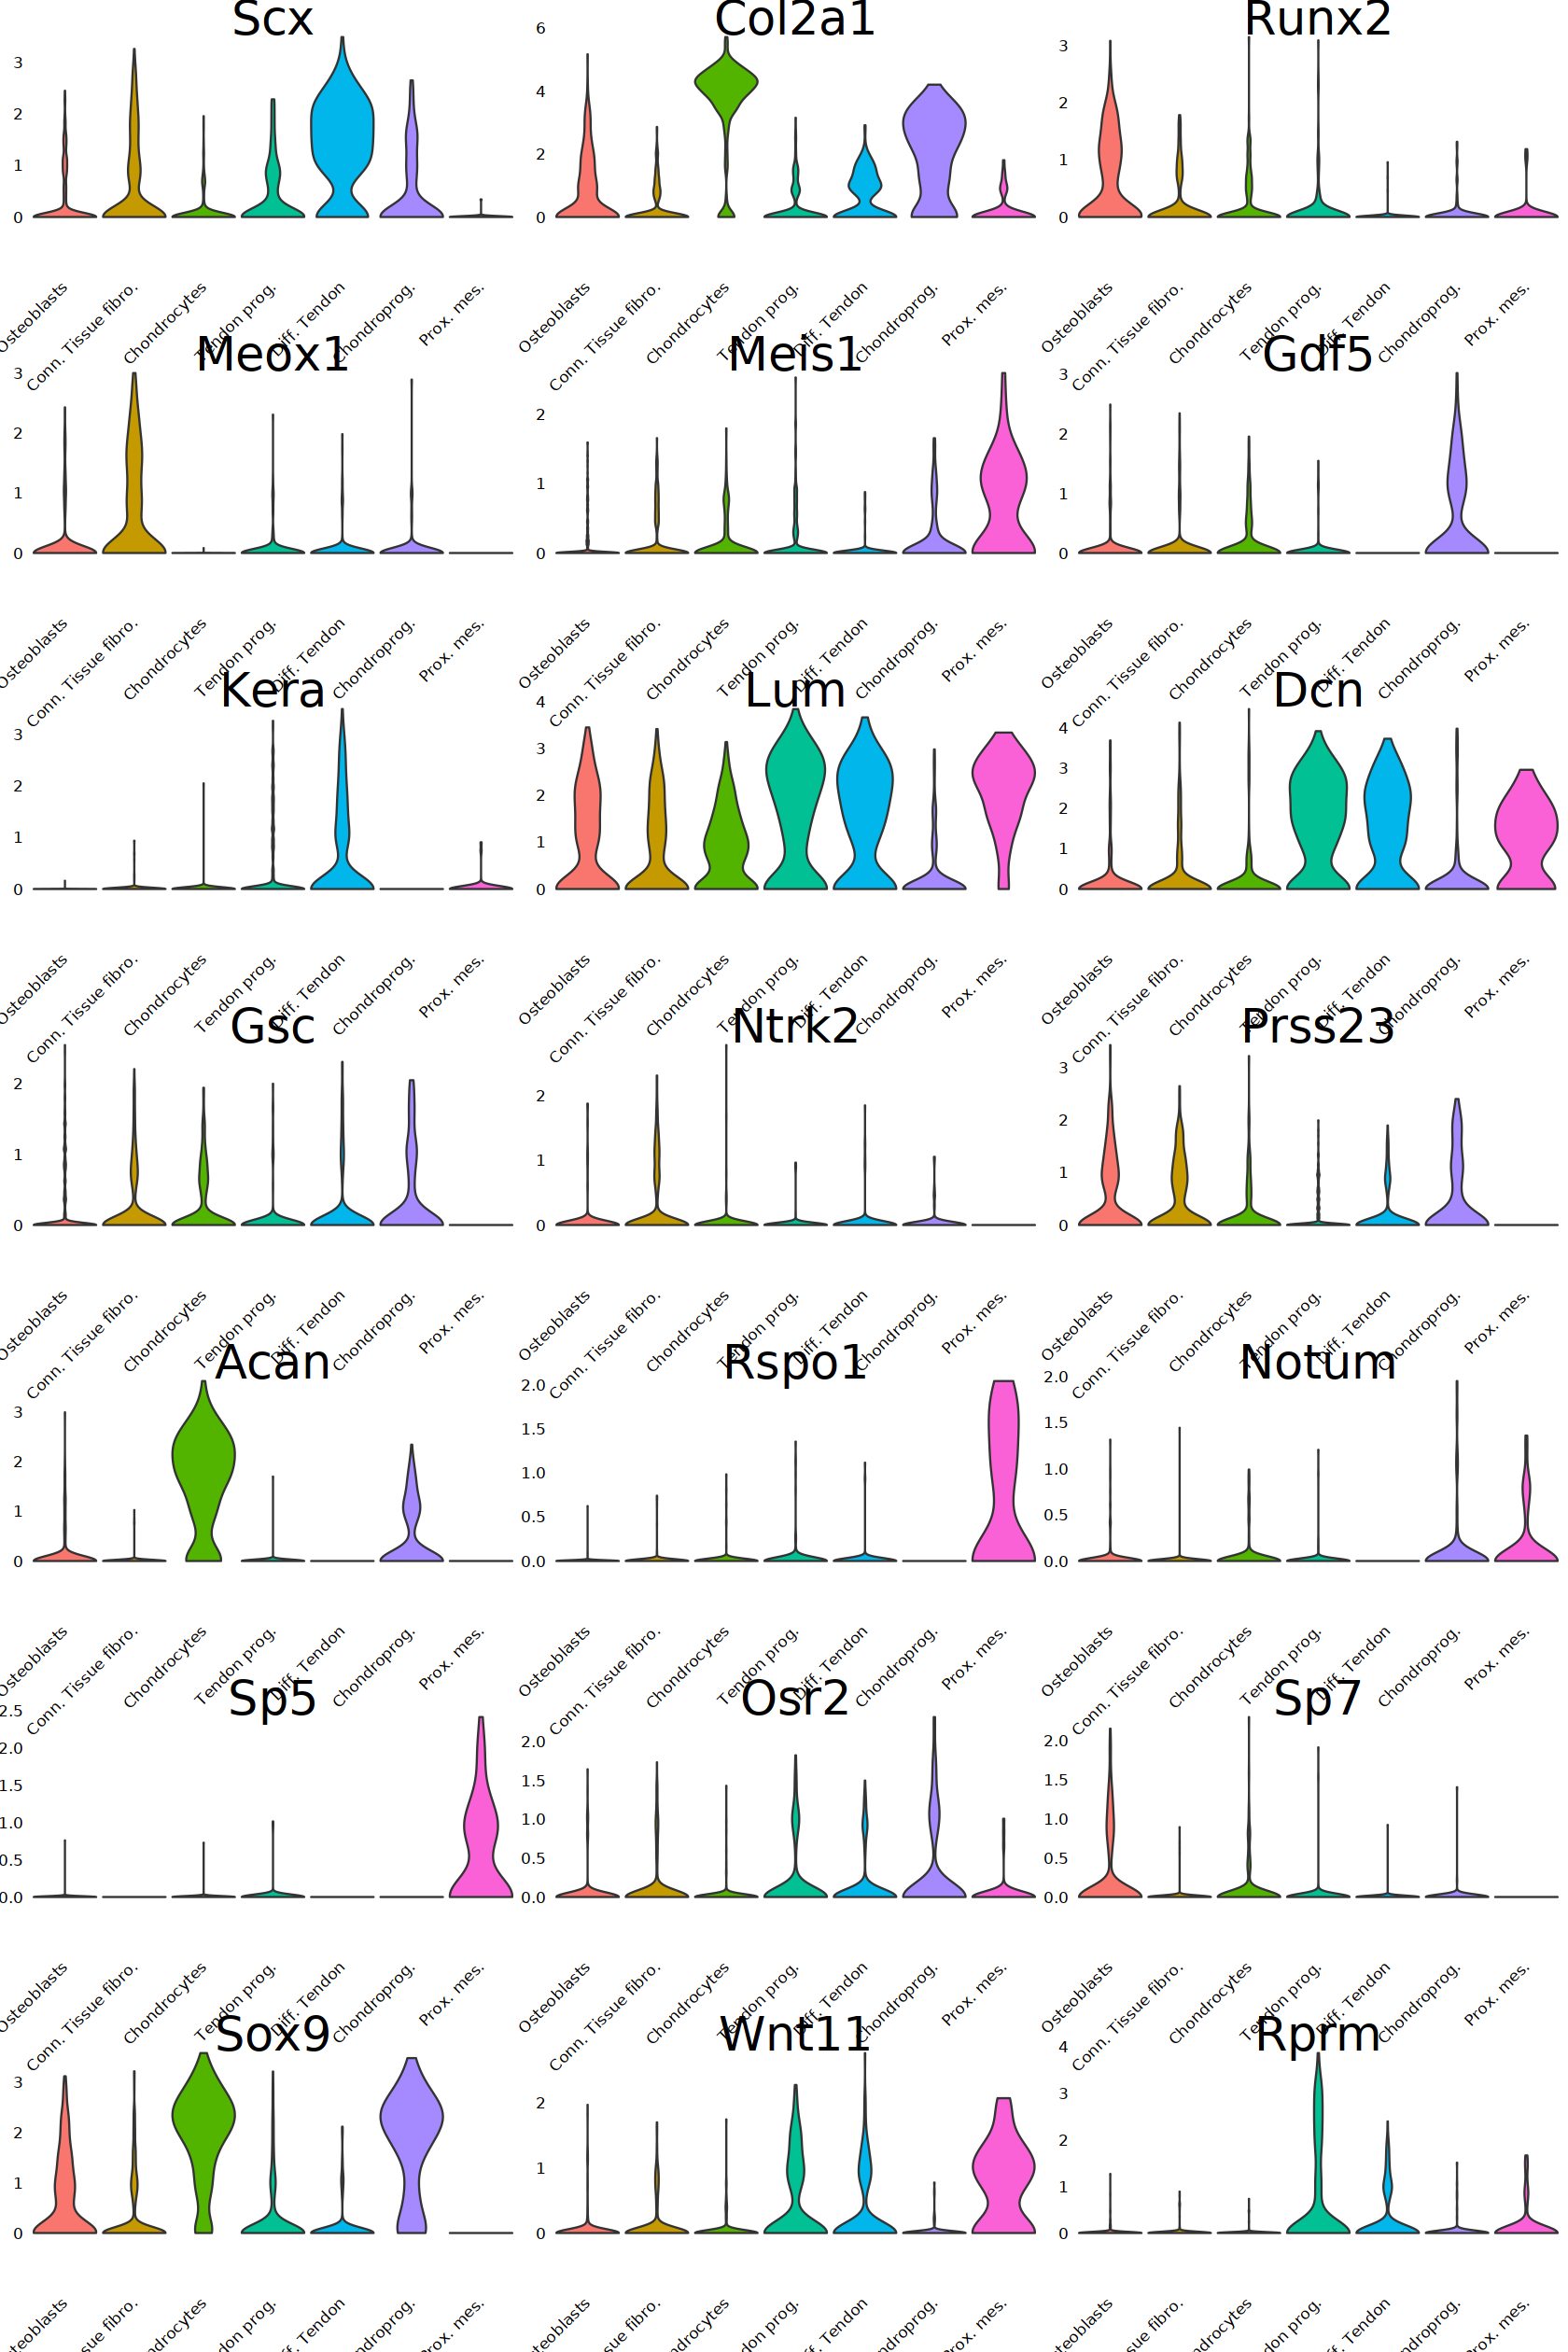

In [8]:
p2 <-
FetchData(
    integrated.xeno,
    vars = c(
        paste0( gene.list ),
        "free.annotation",
        "integrated_snn_res.0.6"
    )
) %>%
pivot_longer(
    cols = any_of( gene.list ),
    names_to = "feature",
    values_to = "expression"
) %>%
mutate(
    feature = gsub("mm10\\.yuji-", "", feature),
    feature = factor(
        feature,
        levels = gene.list
    ),
    free.annotation2 = case_when(
        integrated_snn_res.0.6 == 7 ~ "Prox. mes.", # Dorsal subectodermal mesenchyme
        integrated_snn_res.0.6 == 6 ~ "Chondroprog.",
        integrated_snn_res.0.6 == 5 ~ "Diff. Tendon",
        integrated_snn_res.0.6 == 4 ~ "Tendon prog.",
        integrated_snn_res.0.6 == 3 ~ "Chondrocytes",
        integrated_snn_res.0.6 == 2 ~ "Conn. Tissue fibro.",
        integrated_snn_res.0.6 == 1 ~ "Osteoblasts"        
    ),
    free.annotation2 = factor(
        free.annotation2,
        levels = c(
            "Osteoblasts",
            "Conn. Tissue fibro.",
            "Chondrocytes",
            "Tendon prog.",
            "Diff. Tendon",
            "Chondroprog.",
            "Prox. mes."
        )
    )
) %>%
group_split( feature ) %>%
map(
    ~ggplot( ., aes( x = free.annotation2, y = expression, fill = free.annotation) ) +
    geom_violin( scale="width") +
    ggtitle( .$feature %>% unique() )
) %>%
reduce(`+`) +
plot_layout(ncol = 3) &
theme_void() &
  theme(
    legend.position = "none",
    #plot.margin = margin(0, 0, 0, 0, "line"),
    axis.line = element_blank(),
    axis.title = element_blank(),
    axis.ticks = element_blank(),
    axis.text.y = element_text( size = 10 ),
    axis.text.x = element_text( size = 10, angle = 45, hjust = 1 ),
    text = element_text( size = 20 ),
    plot.title = element_text( size = 30, face="bold.italic", margin=margin(0,0,-10,0), hjust = 0.5 )
  )


options( repr.plot.width = 14, repr.plot.height = 21 )
p2

In [29]:
# ggsave("./figures/FigureS7B.png", plot = p2, width=14, height=21)